<a href="https://colab.research.google.com/github/Nsi20/Nigeria-Inflation-Rates-/blob/main/Forecasting_Nigeria's_Inflation_A_Machine_Learning_Approach_to_Economic_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Forecasting Nigeria's Inflation: A Machine Learning Approach to Economic Insights***

In [1]:
from google.colab import files
uploaded = files.upload()


Saving NigeriaInflationRates.csv to NigeriaInflationRates.csv


In [2]:
import pandas as pd

df = pd.read_csv('NigeriaInflationRates.csv')

df.head()


,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education
0,2008,1,8.6,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466
1,2008,2,8.0,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619
2,2008,3,7.8,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847
3,2008,4,8.2,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248
4,2008,5,9.7,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               198 non-null    int64  
 1   Month              198 non-null    int64  
 2   Inflation_Rate     198 non-null    float64
 3   Crude Oil Price    197 non-null    float64
 4   Production         197 non-null    float64
 5   Crude Oil Export   197 non-null    float64
 6   CPI_Food           198 non-null    float64
 7   CPI_Energy         198 non-null    float64
 8   CPI_Health         198 non-null    float64
 9   CPI_Transport      198 non-null    float64
 10  CPI_Communication  198 non-null    float64
 11  CPI_Education      198 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 18.7 KB


# **Data Preprocessing**

In [4]:
df_filled = df.fillna(df.mean())


In [5]:

df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))


df = df[['Date'] + [col for col in df.columns if col != 'Date']]


In [10]:
import pandas as pd
import numpy as np # Import numpy with the alias 'np'

# Checking for NaN values
print(df.isnull().sum())

print(np.isinf(df).sum())

Date                 0
Year                 0
Month                0
Inflation_Rate       0
Crude Oil Price      1
Production           1
Crude Oil Export     1
CPI_Food             0
CPI_Energy           0
CPI_Health           0
CPI_Transport        0
CPI_Communication    0
CPI_Education        0
dtype: int64
Date                 0
Year                 0
Month                0
Inflation_Rate       0
Crude Oil Price      0
Production           0
Crude Oil Export     0
CPI_Food             0
CPI_Energy           0
CPI_Health           0
CPI_Transport        0
CPI_Communication    0
CPI_Education        0
dtype: int64


In [11]:
# Detecting outliers using IQR
Q1 = df_filled.quantile(0.25)
Q3 = df_filled.quantile(0.75)
IQR = Q3 - Q1

# Filtering out rows where numerical values are considered outliers
df_no_outliers = df_filled[~((df_filled < (Q1 - 1.5 * IQR)) | (df_filled > (Q3 + 1.5 * IQR))).any(axis=1)]

# Displaying the number of rows before and after removing outliers
print(f"Rows before outlier removal: {df_filled.shape[0]}")
print(f"Rows after outlier removal: {df_no_outliers.shape[0]}")


Rows before outlier removal: 198
Rows after outlier removal: 187


# **Exploratory Data Analysis (EDA)**

**1. Summary Statistics**

In [12]:
import pandas as pd

# Computing summary statistics
summary_stats = df_no_outliers.describe()

# Computing mode
mode_values = df_no_outliers.mode().iloc[0]

# Displaying the results
print("Summary Statistics:\n", summary_stats)
print("\nMode Values:\n", mode_values)


Summary Statistics:
               Year       Month  Inflation_Rate  Crude Oil Price  Production  \
count   187.000000  187.000000      187.000000       187.000000  187.000000   
mean   2015.299465    6.406417       13.111818        79.425009    1.957759   
std       4.514749    3.450972        3.800726        27.187880    0.393028   
min    2008.000000    1.000000        7.700000        14.280000    0.940000   
25%    2011.000000    3.000000       10.350000        57.770000    1.780000   
50%    2015.000000    6.000000       12.400000        75.790000    2.050000   
75%    2019.000000    9.000000       15.665000       106.425000    2.215000   
max    2023.000000   12.000000       24.080000       138.740000    2.880000   

       Crude Oil Export    CPI_Food  CPI_Energy  CPI_Health  CPI_Transport  \
count        187.000000  187.000000  187.000000  187.000000     187.000000   
mean           1.507759  244.481566  216.468170  191.747027     208.924556   
std            0.393028  152.4402

**2. Data Visualization**

a) Histograms

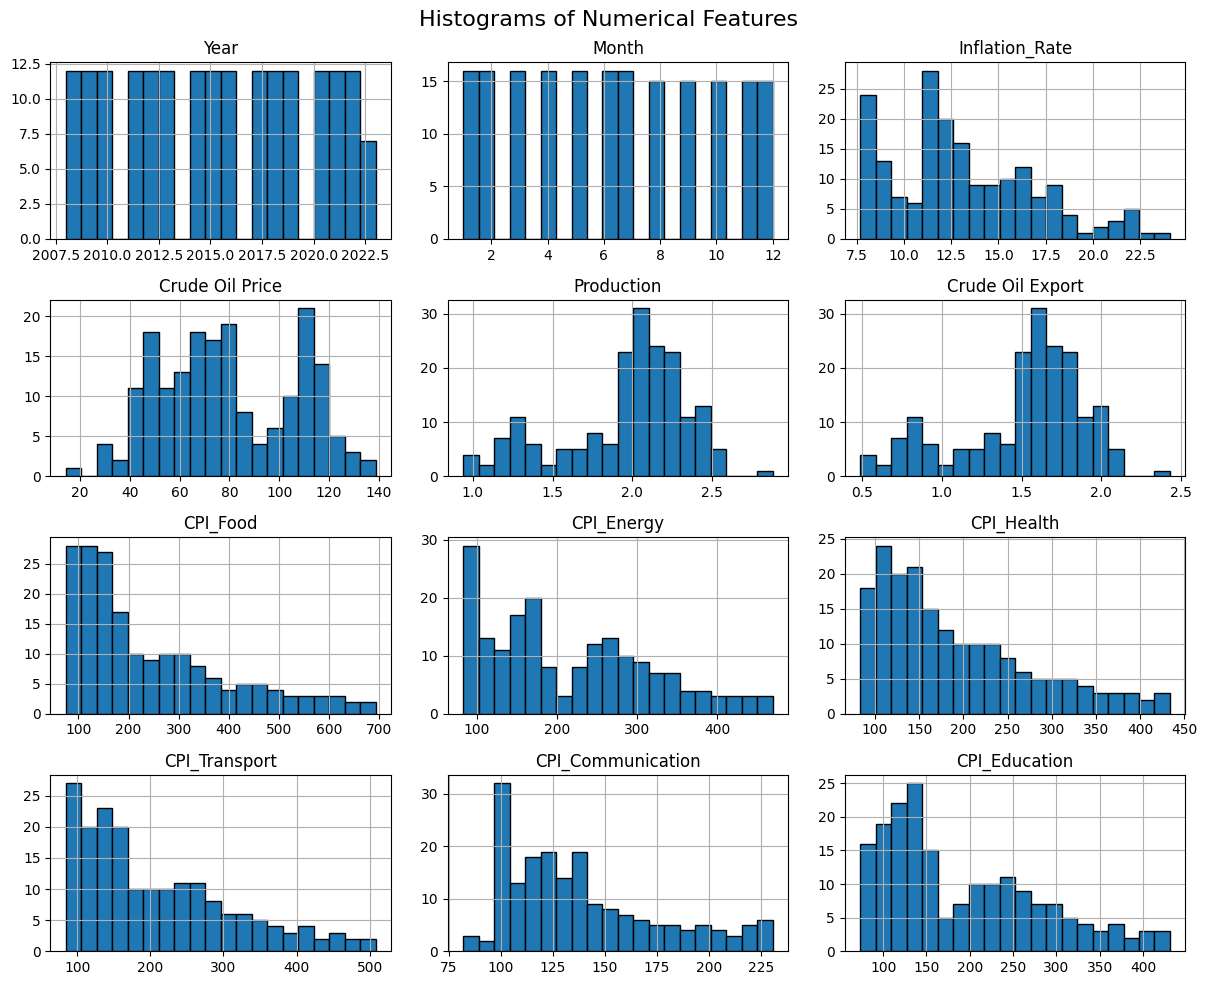

In [14]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
df_no_outliers.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', size=16)
plt.tight_layout()
plt.show()


**b) Line Graph (Inflation Rate Over Time)**

<ipython-input-16-852f558a5e99>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Date'] = pd.to_datetime(df_no_outliers['Year'].astype(str) + '-' + df_no_outliers['Month'].astype(str), format='%Y-%m')


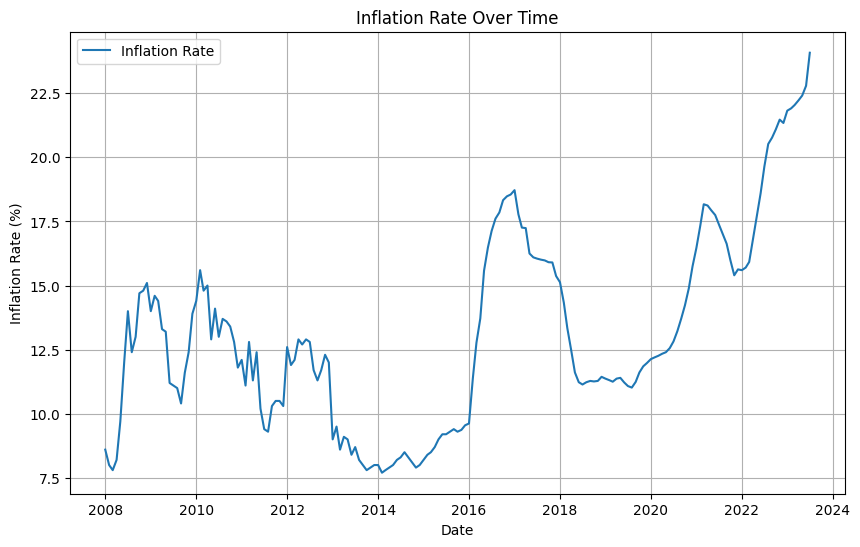

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

df_no_outliers['Date'] = pd.to_datetime(df_no_outliers['Year'].astype(str) + '-' + df_no_outliers['Month'].astype(str), format='%Y-%m')


# Ploting Inflation Rate over time
plt.figure(figsize=(10, 6))
plt.plot(df_no_outliers['Date'], df_no_outliers['Inflation_Rate'], label='Inflation Rate')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.title('Inflation Rate Over Time')
plt.grid(True)
plt.legend()
plt.show()

**c) Scatter Plot (Inflation Rate vs. Crude Oil Price)**

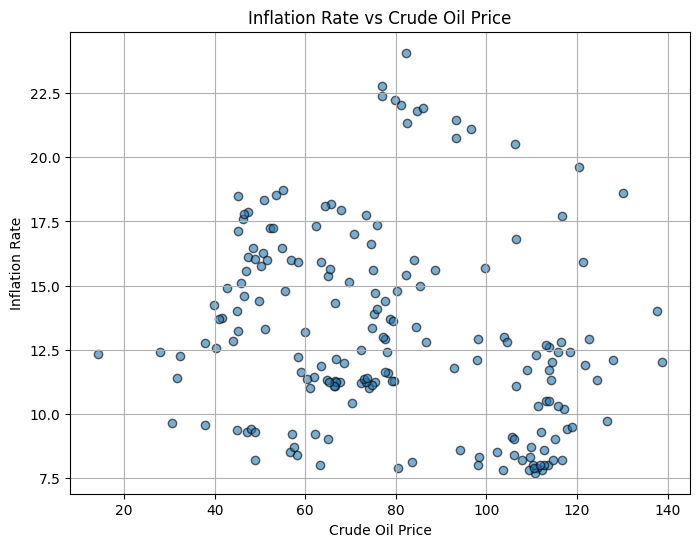

In [17]:
# Scatter plot between Inflation Rate and Crude Oil Price
plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers['Crude Oil Price'], df_no_outliers['Inflation_Rate'], alpha=0.6, edgecolor='k')
plt.xlabel('Crude Oil Price')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rate vs Crude Oil Price')
plt.grid(True)
plt.show()


**d) Bar Chart (CPI Categories)**

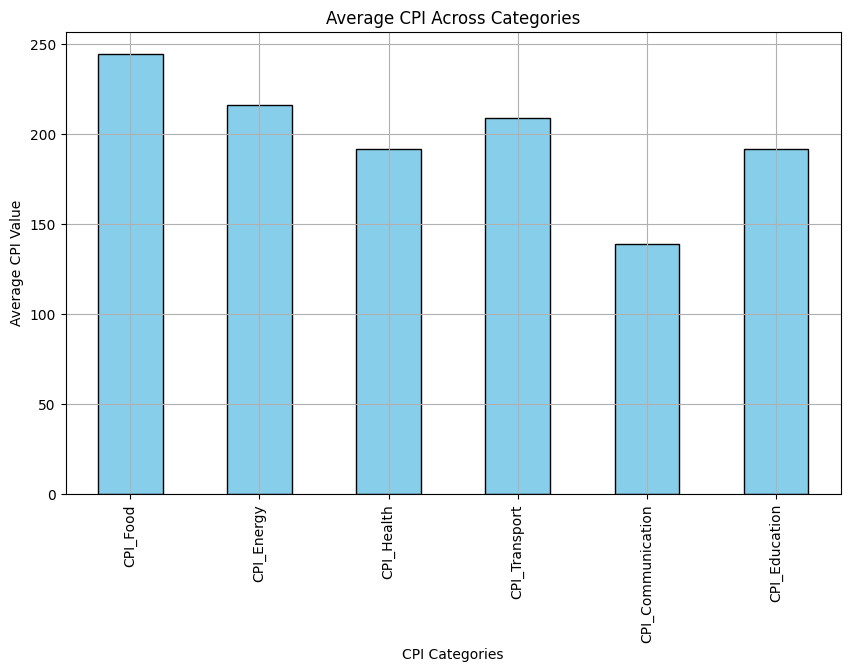

In [18]:
# Bar chart for CPI categories
cpi_columns = ['CPI_Food', 'CPI_Energy', 'CPI_Health', 'CPI_Transport', 'CPI_Communication', 'CPI_Education']

cpi_means = df_no_outliers[cpi_columns].mean()

# Ploting CPI categories
plt.figure(figsize=(10, 6))
cpi_means.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('CPI Categories')
plt.ylabel('Average CPI Value')
plt.title('Average CPI Across Categories')
plt.grid(True)
plt.show()


## 3 **Correlation Analysis** **bold text**

a) Correlation Matrix

In [19]:
# Computing the correlation matrix
correlation_matrix = df_no_outliers.corr()

# Displaying the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                        Year     Month  Inflation_Rate  Crude Oil Price  \
Year               1.000000 -0.046502        0.539366        -0.320494   
Month             -0.046502  1.000000       -0.000089        -0.029314   
Inflation_Rate     0.539366 -0.000089        1.000000        -0.221539   
Crude Oil Price   -0.320494 -0.029314       -0.221539         1.000000   
Production        -0.787585 -0.023315       -0.705293         0.201222   
Crude Oil Export  -0.787585 -0.023315       -0.705293         0.201222   
CPI_Food           0.927984 -0.002954        0.693025        -0.171212   
CPI_Energy         0.976277  0.005367        0.653762        -0.253035   
CPI_Health         0.947852  0.000168        0.675687        -0.195420   
CPI_Transport      0.951892 -0.002545        0.677775        -0.203397   
CPI_Communication  0.952503  0.008331        0.657624        -0.189299   
CPI_Education      0.960699  0.001438        0.675184        -0.232466   
Date             

b) Heatmap of the Correlation Matrix

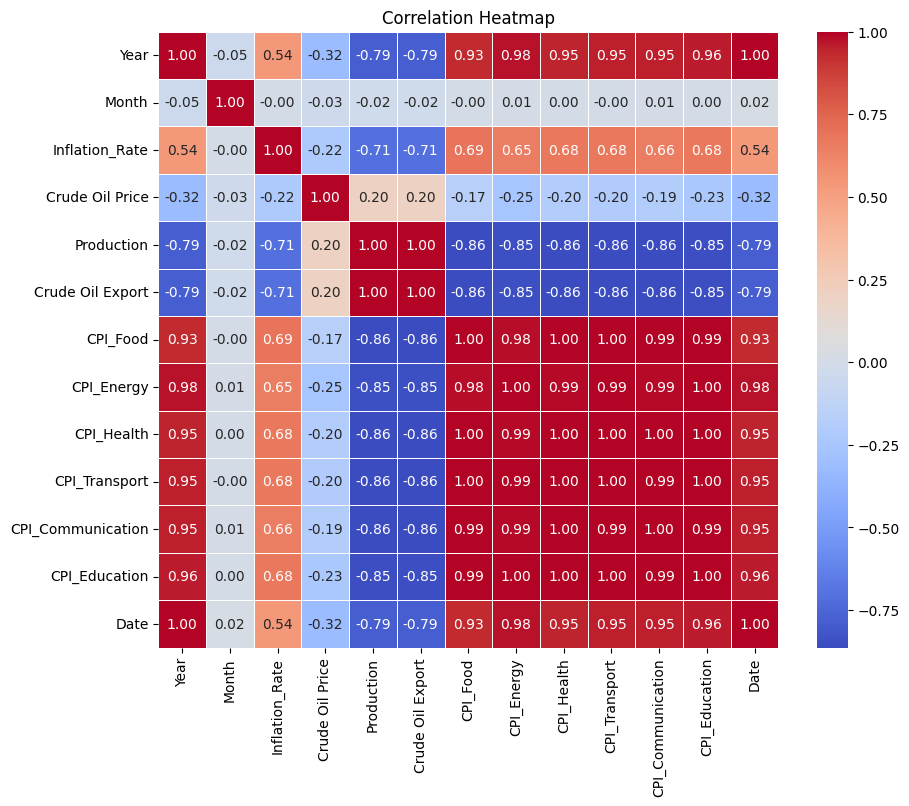

In [20]:
import seaborn as sns

# Plotting heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# **4. Temporal Analysis**

a) Temporal Trend of CPI Categories

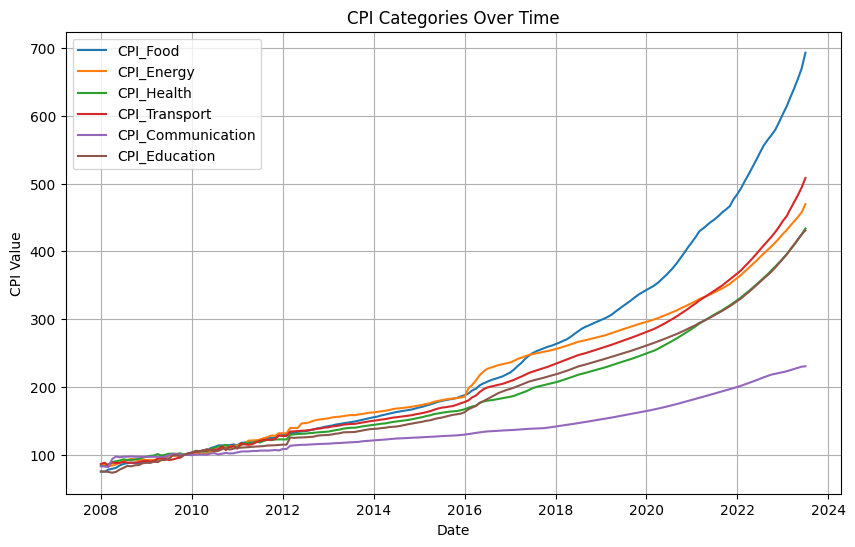

In [21]:
# Plotting trends of different CPI categories over time
plt.figure(figsize=(10, 6))
for cpi_col in cpi_columns:
    plt.plot(df_no_outliers['Date'], df_no_outliers[cpi_col], label=cpi_col)

plt.xlabel('Date')
plt.ylabel('CPI Value')
plt.title('CPI Categories Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# **Data Modeling**

1. **Train-Test Split**

In [22]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = df_no_outliers.drop(columns=['Inflation_Rate', 'Date'])  # Drop the target and Date
y = df_no_outliers['Inflation_Rate']  # The target is inflation rate

# Spliting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the resulting datasets
print(f"Training set: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing set: X_test {X_test.shape}, y_test {y_test.shape}")


Training set: X_train (149, 11), y_train (149,)
Testing set: X_test (38, 11), y_test (38,)


**2. Model Training**

a) Linear Regression


In [23]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_model.predict(X_test)


b) Random Forest Regression (for comparison)

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)


# **4. Model Evaluation**

a) Linear Regression Evaluation

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate Linear Regression Model
rmse_linear = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2_linear = r2_score(y_test, y_pred)  # R-squared

print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Linear Regression R² Score: {r2_linear}")


Linear Regression RMSE: 1.9321591827677622
Linear Regression R² Score: 0.7249844222733557


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


b) Random Forest Regression Evaluation

In [27]:
# Evaluating Random Forest Model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)  # RMSE
r2_rf = r2_score(y_test, y_pred_rf)  # R-squared

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R² Score: {r2_rf}")


Random Forest RMSE: 0.7240707135065595
Random Forest R² Score: 0.9613781163206898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# **5. Cross-Validation**

In [28]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the linear model
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold and the mean
cv_rmse = (-cv_scores) ** 0.5
mean_cv_rmse = cv_rmse.mean()

print(f"Cross-Validation RMSE for Linear Regression: {mean_cv_rmse}")


Cross-Validation RMSE for Linear Regression: 6.549773848350872


# **Interpretation and Insights**

**1. Model Interpretability**

a) Feature Coefficients in Linear Regression

In [29]:
# Getting the coefficients of the linear regression model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})

# Sorting by absolute coefficient value
coefficients = coefficients.reindex(coefficients.Coefficient.abs().sort_values(ascending=False).index)

# Displaying feature importance (coefficients)
print(coefficients)


              Feature  Coefficient
0                Year    -3.837064
3          Production    -1.388917
4    Crude Oil Export    -1.388917
1               Month    -0.329092
10      CPI_Education     0.273354
7          CPI_Health     0.221483
8       CPI_Transport    -0.189966
5            CPI_Food    -0.158353
6          CPI_Energy     0.133939
9   CPI_Communication     0.124066
2     Crude Oil Price    -0.024924


b) SHAP Values (For Model Interpretability)

In [32]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 12.8 MB/s eta 0:00:00


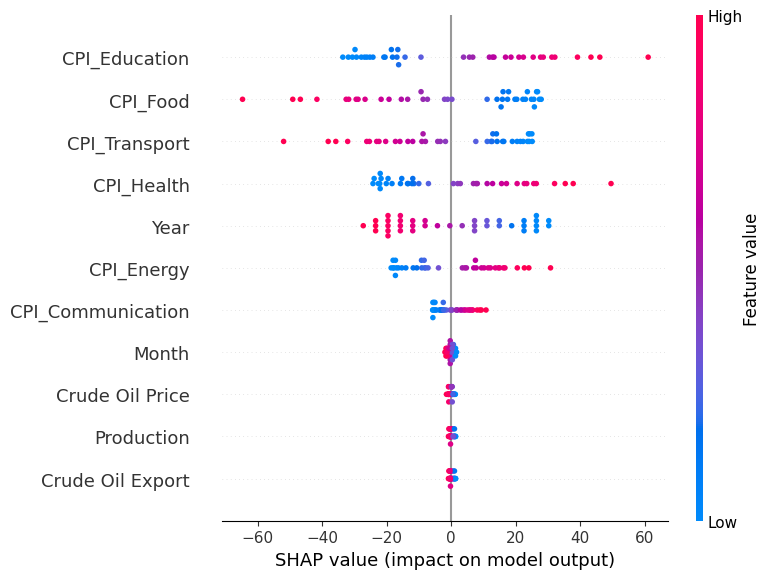

In [33]:
import shap

# Initializing SHAP explainer
explainer = shap.LinearExplainer(linear_model, X_train)

# Calculating SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plotting SHAP summary plot
shap.summary_plot(shap_values, X_test)